<a href="https://colab.research.google.com/github/alizehadeel/AI-ML-Notebook/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices: Advanced Regression Techniques - Data Preprocessing Lab


In this lab, we will work with the Kaggle **House Prices: Advanced Regression Techniques** dataset.  
We will cover:
1. Reading the dataset  
2. Exploratory Data Analysis (EDA)  
3. Handling Missing Values  
4. Encoding Categorical Variables  
5. Detecting & Removing Outliers (Z-score and IQR methods)  
6. Feature Selection using Correlation  
7. Dimensionality Reduction using PCA  

This will give you a complete hands-on workflow for preparing data for machine learning.


## Task 1: Reading the Dataset
Read the dataset using Pandas with default indexing.

In [ ]:

import pandas as pd

# Write your code below
ht=pd.read_csv('https://raw.githubusercontent.com/alizehadeel/AI-ML-Notebook/refs/heads/main/housetrain.csv')
ht.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 2: Exploratory Data Analysis (EDA)
We check basic statistics and visualize missing values, distributions, etc.

In [ ]:

# Basic info
# Find the missing values
# Find the statistical data analysis on the data
ht.info()
ht.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3: Handling Missing Values
We can fill missing numeric values with median and categorical with mode.

In [ ]:
ht.LotFrontage.fillna(ht.LotFrontage.median(), inplace=True)
ht.MasVnrType.fillna(ht.MasVnrType.mode()[0], inplace=True)
ht.MasVnrArea.fillna(ht.MasVnrArea.median(), inplace=True)
ht.BsmtQual.fillna(ht.BsmtQual.mode()[0], inplace=True)
ht.BsmtCond.fillna(ht.BsmtCond.mode()[0], inplace=True)
ht.BsmtExposure.fillna(ht.BsmtExposure.mode()[0], inplace=True)
ht.BsmtFinType1.fillna(ht.BsmtFinType1.mode()[0], inplace=True)
ht.BsmtFinType2.fillna(ht.BsmtFinType2.mode()[0], inplace=True)
ht.Electrical.fillna(ht.Electrical.mode()[0], inplace=True)
ht.FireplaceQu.fillna(ht.FireplaceQu.mode()[0], inplace=True)
ht.GarageType.fillna(ht.GarageType.mode()[0], inplace=True)
ht.GarageYrBlt.fillna(ht.GarageYrBlt.median(), inplace=True)
ht.GarageFinish.fillna(ht.GarageFinish.mode()[0], inplace=True)
ht.GarageQual.fillna(ht.GarageQual.mode()[0], inplace=True)
ht.GarageCond.fillna(ht.GarageCond.mode()[0], inplace=True)

# Fill numeric columns with median
# Fill categorical columns with mode



ht.drop('Alley', axis=1, inplace=True)
ht.drop('PoolQC', axis=1, inplace=True)
ht.drop('Fence', axis=1, inplace=True)
ht.drop('MiscFeature', axis=1, inplace=True)

/tmp/ipython-input-3081978878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ht.LotFrontage.fillna(ht.LotFrontage.median(), inplace=True)
/tmp/ipython-input-3081978878.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

## Step 4: Encoding Categorical Variables
Convert categorical (string) values into numbers using Label Encoding and One-Hot Encoding.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categorical_col=ht.select_dtypes(include=['object']).columns#without .columns, we would get complete columns as dataframe, now we only get column names
print(categorical_col)
for col in categorical_col:
  ht[col]=le.fit_transform(ht[col])
ht.head()

Index([], dtype='object')


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


## Step 5: Outlier Detection
Use Z-scores to find outliers

In [ ]:
import numpy as np
from scipy.stats import zscore
zscores=np.abs(zscore(ht))
threshold=3
outliers=(zscores>threshold)#boolean check, will return a matrix mask of original data of true/false
print(outliers)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


## Step 6: Outlier Detection and Removal (IQR)
We use IQR to detect and remove outliers.

In [ ]:

# Us from scratch IQR method to identify and remove outliers. Please make comparative study between
# z-score and IQR in identifying better method for identification of outliers on our dataset.
for col in ht.columns:
  Q1=ht[col].quantile(0.25)
  Q3=ht[col].quantile(0.75)
  IQR=Q3-Q1
  lowerbound=Q1 - 1.5 * IQR
  upperbound=Q3 + 1.5 * IQR
  ht=ht[(ht[col] >= lowerbound) & (ht[col] <= upperbound)]#vectorization:where you compare a scalar with a column element-wise
ht.info()#filtering is done based on true/false result of the comparison, only true rows are kept, if even a single value is false, the entire row is removed

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 1455
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             62 non-null     int64  
 1   MSSubClass     62 non-null     int64  
 2   MSZoning       62 non-null     int64  
 3   LotFrontage    62 non-null     float64
 4   LotArea        62 non-null     int64  
 5   Street         62 non-null     int64  
 6   LotShape       62 non-null     int64  
 7   LandContour    62 non-null     int64  
 8   Utilities      62 non-null     int64  
 9   LotConfig      62 non-null     int64  
 10  LandSlope      62 non-null     int64  
 11  Neighborhood   62 non-null     int64  
 12  Condition1     62 non-null     int64  
 13  Condition2     62 non-null     int64  
 14  BldgType       62 non-null     int64  
 15  HouseStyle     62 non-null     int64  
 16  OverallQual    62 non-null     int64  
 17  OverallCond    62 non-null     int64  
 18  YearBuilt      

## Step 7: Feature Selection using Correlation
We check correlation with the target variable `SalePrice`. Variables with high correlation are more predictive.

GrLivArea       0.894227
OverallQual     0.823765
FullBath        0.816381
GarageArea      0.789085
GarageCars      0.764396
GarageYrBlt     0.736321
YearBuilt       0.722097
TotRmsAbvGrd    0.709260
2ndFlrSF        0.703397
Foundation      0.699131
Name: SalePrice, dtype: float64


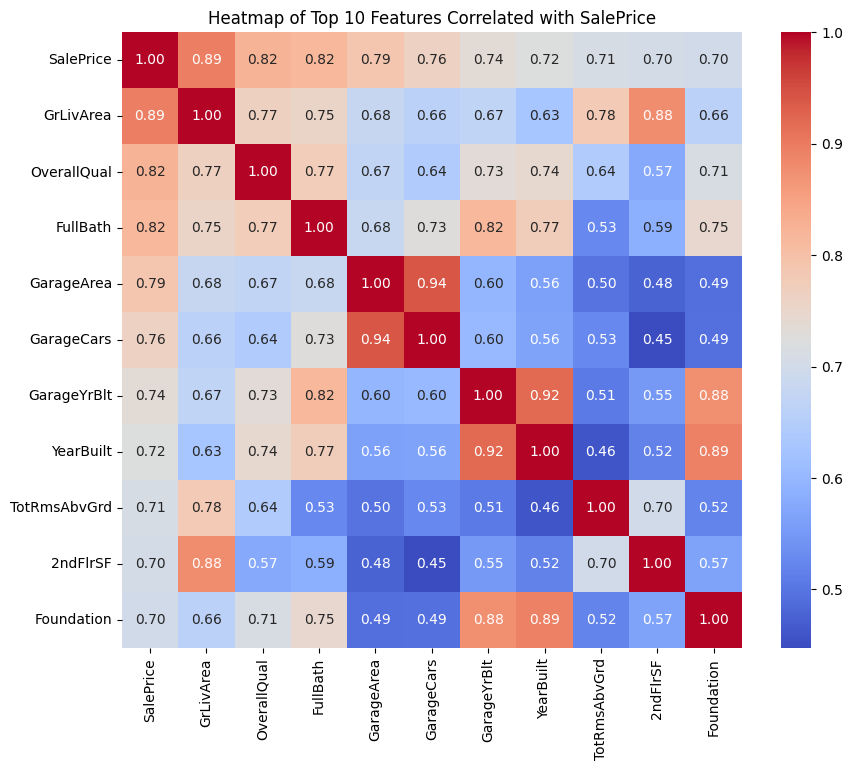

In [ ]:
# Take SalePrice as a reference column and find 10 of the most highest correlated columns to price.
# For Machine Learning purposes and draw their heatmap.
correlation_matrix=ht.corr()
salePriceCorr=correlation_matrix.SalePrice.sort_values(ascending=False)
top10=salePriceCorr[1:11]
print(top10)
top_features = ht[["SalePrice"] + top10.index.tolist()]
#top10.index.tolist- In Pandas, a Series has two parts:index(label) and values, tolist converts it into a python list

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(top_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
#annot: corr values on heatmap, cmap: colour gradient, fmt: format of numbers
plt.title("Heatmap of Top 10 Features Correlated with SalePrice")
plt.show()


## Step 8: Dimensionality Reduction using PCA
We use Principal Component Analysis (PCA) to reduce dimensionality.

Explained variance ratio: [0.33090899 0.10543223]
Total variance retained: 0.43634121767326095
        PC1       PC2
0  3.543706 -2.677389
1  3.722045 -2.096442
2 -3.978549  1.144457
3 -6.411188 -1.831316
4  3.828535 -0.233937


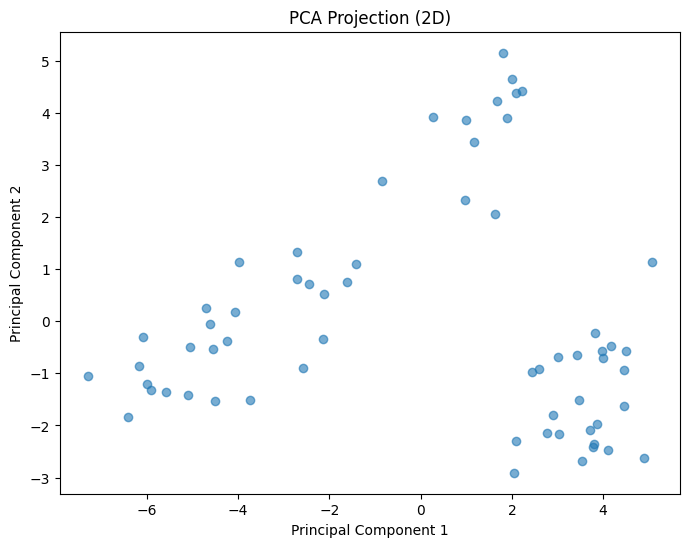

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Standardize the data so all features have equal weight
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ht)

#Apply PCA to reduce data to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Print how much variance each principal component explains
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", pca.explained_variance_ratio_.sum())

#Create a DataFrame for the PCA results
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print(pca_df.head())

#Plot the PCA projection in 2D
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2D)')
plt.show()
